# Portfolio assignment week 5
This weeks assignment is about the SVC model and evaluating this model

## 1.1 SVC
Support Vector Classifier(SVC) is a suppervised classification model that works by mapping data points to high-dimensional space and then finding the optimal hyperplane that divides the data into two classes. The make_moons is an excelent dataset to give an example of how this would work because it has two classes (0 and 1).

Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  MinMaxScaler, StandardScaler 
from sklearn.svm import SVC

# Load the data

In [22]:
X, y = make_moons(n_samples=200, random_state=42, shuffle=True)


# Splitting the data

In [23]:
train_amount = int(X.shape[0]/100*80)
X_train, y_train = X[:train_amount], y[:train_amount]
X_test, y_test = X[train_amount:], y[train_amount:]

A meshgrid is made to divide the two classes in order to distinguish them with color using matplotlibs contour function and the coolwarm colourmap

In [24]:
def make_meshgrid(X, h=.01):
    """Create a mesh grid based on vectors X and Y."""
    if X.shape[1] > 2:
        raise ValueError('Requires a matrix of 2 features for visualization purposes.')
    
    x_min = X.min() - 1
    x_max = X.max() + 1
        
    x = np.arange(x_min, x_max, h)
        
    xx, yy = np.meshgrid(x, x)
    
    return xx, yy



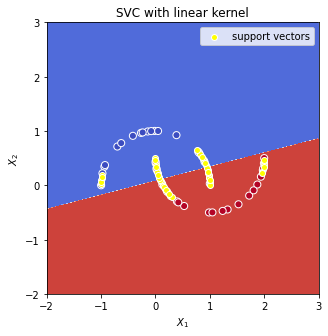

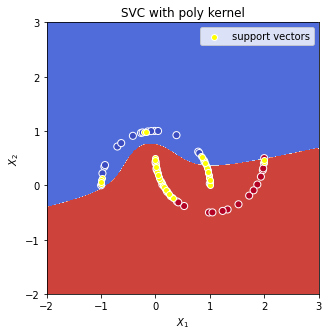

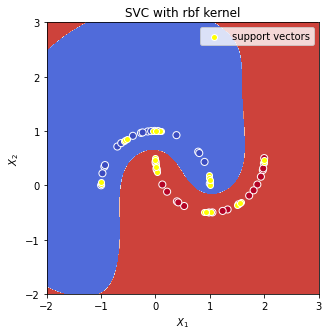

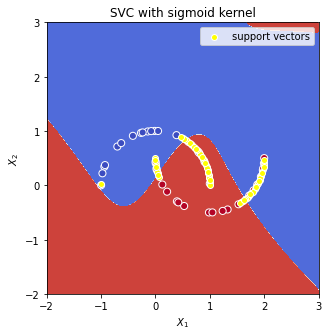

In [25]:
def svc_models(kernels):
    for kernel in kernels: 
        svc = SVC(kernel= kernel)
        svc.fit(X_train, y_train)

        xx, yy = make_meshgrid(X)
        grid = np.c_[xx.ravel(), yy.ravel()]

        svm_pred = svc.predict(grid).reshape(xx.shape)

        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        axes.contourf(xx, yy, svm_pred, cmap=plt.cm.coolwarm)
        axes.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
        axes.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], edgecolor='white', color='yellow', label='support vectors')
        axes.set(aspect='equal',
                xlim=(X.min() - 1, X.max() + 1),
                ylim=(X.min() - 1, X.max() + 1),
                xlabel='$X_1$',
                ylabel='$X_2$')
        axes.set_title(f'SVC with {kernel} kernel')
        axes.legend()
        plt.show()
svc_models(['linear', 'poly', 'rbf', 'sigmoid'])

## Kernels

Linear as the name suggest tries to create the beste linear separation between the 2 classes with a linear line.

Poly predicts the polynomial kernel between X and Y dependend on the degree value.

When the RBF kernel is chosen two parameters must be considered: C and gamma. the parameter c trades off missclassification of training examples against simplicity of the decision surface. low C makes the decision surface smooth, while high C aims at classifying all training examples correctly. the gamma defines how much influence a signle training example has.

Sigmoid gives a strange seperation back likely due to the fact that there are negative values in this dataset.

# 2. Model Evaluation

In [26]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
import yaml

## 2.1 load the data/understand the dataset globally
looking at the data below we can see that it contains 2 types of breast cancer(malignant and benign). Each cancer is measured in 30 ways(e.g radius_mean, texture_mean). Like the make_moons data set this dataset should also work great with svc because we have two classes(malignant and benign).

In [27]:
def get_config():
    with open("../config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

In [28]:
config = get_config()
df = pd.read_csv(config['breastcancer'])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory analysis
Because there are 2 groups and loads of parameters which we don't know what is the most important. We can use Linear Discriminant Analysis(LDA) to find the component that maximizes the separation of the two groups(malignant and benign).

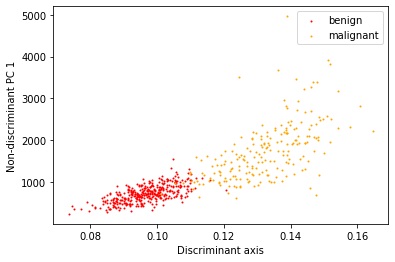

In [29]:
# devide the data
malignant = np.array(df[df['diagnosis'] == 'M'].values[:, 2:], dtype=float)
benign = np.array(df[df['diagnosis'] == 'B'].values[:, 2:], dtype=float)

#calculate the mean and the covariance
meanM = malignant.mean(axis=0)
meanB = benign.mean(axis=0)
nM = malignant.shape[0]
nB = benign.shape[0]
covM = np.cov(malignant.T)
covB = np.cov(benign.T)

#calculate the pooled covariance matrix
pooled = ((nB -1) * covB +(nM - 1) * covM) / (nB + nM -2)

#project the data onto the disciminant axis
a = np.linalg.inv(pooled) @ (meanM - meanB) 
a /= np.sqrt((a ** 2).sum())

tM = malignant @ a
tB = benign @ a

# deflate both groups, combine and plot data
Em = malignant - tM[:, None] * a[None, :]
Eb = benign - tB[:, None] * a[None, :]

X = np.concatenate((Em, Eb), axis=0)
S = np.cov(X.T)
vals, vecs = np.linalg.eig(S)
order = vals.argsort()[::-1]
vecs = vecs[:, order]
vals = vals[order]
Tm = malignant @ vecs
Tb = benign @ vecs

plt.scatter(tB, Tb[:, 0], s=1, c="red", label='benign')
plt.scatter(tM, Tm[:, 0], s=1, c="orange", label='malignant')
plt.xlabel("Discriminant axis")
plt.ylabel("Non-discriminant PC 1")
plt.legend()
plt.show()


In [30]:
print(order)
print(vals/sum(vals)*100)
print("The first feature radius_mean in this dataset has 98% of the separation between the two groups")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 26]
[ 9.82044672e+01  1.61764899e+00  1.55751074e-01  1.20931834e-02
  8.82724495e-03  6.64883907e-04  4.01713380e-04  8.22017111e-05
  3.44130323e-05  1.86016007e-05  6.98917414e-06  1.65905074e-06
  6.99641334e-07  4.77681274e-07  2.93470254e-07  1.40418344e-07
  8.23588250e-08  5.19694263e-08  4.08147829e-08  3.61896671e-08
  1.68894867e-08  1.23611064e-08  7.38689799e-09  6.27353255e-09
  3.56926361e-09  2.71026566e-09  6.63379946e-10  5.42491324e-10
  2.18755120e-10 -7.16772682e-21]
The first feature radius_mean in this dataset has 98% of the separation between the two groups


## Preprocessing
A labelEncoder is used to encode the classes to 0(benign) and 1(malignant)

In [39]:
# Preprocessing the data with 
X = np.array(df.values[:, 2], dtype=float)
X = np.reshape(X, (X.shape[0], 1))
scaler=MinMaxScaler()
X= scaler.fit_transform(X)

y = df.values[:, 1]
encoded_y = preprocessing.LabelEncoder()
y = np.array(encoded_y.fit(y).transform(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9001)
print(X_train)

[[0.30096076]
 [0.51441147]
 [0.28250272]
 [0.25457901]
 [0.21056368]
 [0.09754366]
 [0.31515926]
 [0.36485399]
 [0.36154101]
 [0.50257939]
 [0.24795305]
 [0.31042643]
 [0.22381561]
 [0.32367836]
 [0.25931185]
 [0.34402953]
 [0.35964788]
 [0.52103744]
 [0.55984666]
 [0.30664016]
 [0.21955606]
 [0.22996829]
 [0.25363245]
 [0.41644186]
 [0.20062473]
 [0.28723555]
 [0.3842586 ]
 [0.21245681]
 [0.52293057]
 [0.31847224]
 [0.27161721]
 [0.21056368]
 [0.31941881]
 [0.21718964]
 [0.56599934]
 [0.32746462]
 [0.30616688]
 [0.62468645]
 [0.27398362]
 [0.29480808]
 [0.62563302]
 [0.29244167]
 [0.31610583]
 [0.13280326]
 [0.27351034]
 [0.389938  ]
 [0.13701548]
 [0.47512897]
 [0.25031947]
 [0.18358654]
 [0.53192295]
 [0.27303706]
 [0.34450282]
 [0.19210564]
 [0.58161768]
 [0.35728146]
 [0.23233471]
 [0.28534242]
 [0.4012968 ]
 [0.22381561]
 [0.22618202]
 [0.37715935]
 [0.4883809 ]
 [0.18879265]
 [0.56883904]
 [0.76241185]
 [0.3028539 ]
 [0.38236547]
 [0.65071702]
 [0.22002934]
 [0.18074684]
 [0.20

## Modeling

### SVC

In [45]:
svc = SVC(random_state=42)
params = {
    'kernel': ('poly', 'rbf', 'sigmoid'),
    'gamma': ('scale', 'auto'),
   
}
grid_svc = GridSearchCV(svc, params, verbose=1)
best_svc = grid_svc.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [46]:
best_svc.best_params_

{'gamma': 'scale', 'kernel': 'poly'}

### Logistic regression

In [51]:
logistic_regression = LogisticRegression(random_state=42)
params = {
    'penalty': ['l2', 'elasticnet'],
    'solver': [ 'liblinear', 'sag', 'saga']
    
}
grid_logistic = GridSearchCV(logistic_regression, params, verbose=1)
best_logistic_regression = grid_logistic.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Mike Wierenga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mike Wierenga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mike Wierenga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Mike Wierenga

## Evaluation
a confussion matrix helps to see how well the models predict a certain class. In the confusion matrices below the 0 and 1 on both axis means benign and malignant. It predicts well when a sample is benign in 71 out of 72 cases. for the malignant the prediction went not so well it predicted 31 correct and 11 not correct. this could be because the dataset is not even between malignant and benign.

A precision recall curve is a great way to visualize how the model predict the positive class. It was mentioned in the assignment that the number of false negatives are more important so looking at the positive value which is malignant is not a great option to visualize how well the model works.

### SVC

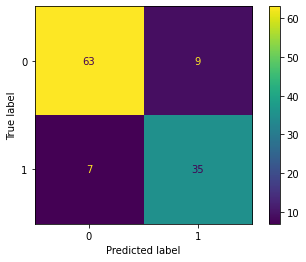

In [15]:
ConfusionMatrixDisplay.from_estimator(best_svc, X_test, y_test)

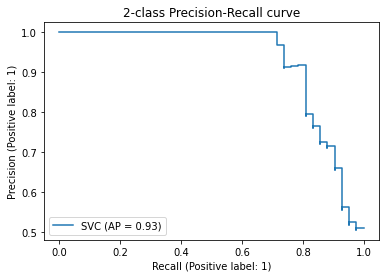

In [16]:
display = PrecisionRecallDisplay.from_estimator(
    best_svc, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### Logistic Regression

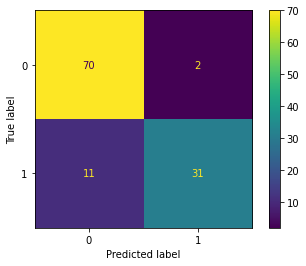

In [17]:
ConfusionMatrixDisplay.from_estimator(best_logistic_regression, X_test, y_test)

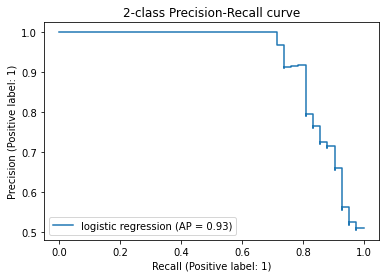

In [18]:
display = PrecisionRecallDisplay.from_estimator(
    best_logistic_regression, X_test, y_test, name="logistic regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")